<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/Tarefa_da_Semana_6_Introdu%C3%A7%C3%A3o_%C3%A0_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECD - Introdução à Visualização de Dados - Semana 6
## Exercícios 
### Gráficos interativos
##### Prof. Dr. Alessandro de Lima Bicho

## Olá, pessoal!
 
Em 15 de abril de 1912, o maior navio de passageiros já construído colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, ele matou 1502 dos 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional, e levou a melhores regulamentos de segurança para os navios. Uma das razões pelas quais o naufrágio resultou em tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas tiveram maior probabilidade de sobreviver do que outros.
 
O dataset titanic.csv contém dados de 887 passageiros reais do Titanic. Cada linha representa uma pessoa. As colunas descrevem diferentes atributos sobre a pessoa, incluindo:
- Survived (sobreviveu): se sobreviveu ao naufrágio estará com 1, e 0 (zero) se não sobreviveu;
- Pclass: tipo de classe de passagem (do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;
- Name: nome do passageiro(a);
- Sex: gênero do passageiro, sendo masculino e feminino;
- Age: idade do passageiro na data da ocorrência do naufrágio;
- Siblings_Spouses_Aboard: número de irmãos/cônjuges a bordo;
- Parents_Children_Aboard: número de pais/filhos a bordo;
- Fare: valor da passagem.  
 
Nesta tarefa, temos duas questões que procurarão fundamentar estatisticamente suas conclusões sobre os sobreviventes deste naufrágio.
 
Bons estudos! 
 
Abraço, Alessandro.

Aqui nós importamos o dataset, que está disponível no meu Google Drive. Caso queiram, podem fazer o download do dataset através do link informado na função `read_csv()` (para análise no Microsoft Excel, por exemplo). 

In [ ]:
#importar a biblioteca pandas e os módulos offline e graph_objs da plotly
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("https://drive.google.com/uc?export=view&id=1Ad2NNAqsCDGwl125D7z-nSbPLVpCFlYu", error_bad_lines=False, encoding = "ISO-8859-1", sep = ",")
df

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


1) Apresente um histograma utilizando a biblioteca Plotly que permita analisar o valor do bilhete dos passageiros.

In [9]:
# Responda aqui a questão 1
#Criando o gráfico, onde nbinsx indica o número de setores a serem analisados no gráfico
data = [go.Histogram(x = df['Fare'],nbinsx=9)]

# Criando o layout
layout = go.Layout(title='Histograma analisando as tarifas  dos passageiros',
                   yaxis={'title':'Frequência'},
                   xaxis={'title': 'Fare'})

# Criando a figura que será exibida, passando informações nas variáveis data e lauyout
fig = go.Figure(data=data, layout=layout)

#Exibindo o gráfico
py.iplot(fig)


2) Apresente um gráfico com múltiplas barras utilizando a biblioteca Plotly que permita analisar sobreviventes por classe (1, 2 e 3).

In [14]:
# Responda aqui a questão 2
#Realiza-se um filtro para encontrar apenas pessoas da classe 3
dfClass3 = df[df['Pclass'] == 3]
#Calcula-se pessoas na classe
dfClass3 = dfClass3.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 3
dataClass3 = go.Bar(name = 'Class3',x = list(dfClass3.index),y = dfClass3[:]) 

#Realiza-se um filtro para encontrar apenas pessoas da classe 2
dfClass2 = df[df['Pclass'] == 2]
#Calcula-se pessoas na classe
dfClass2 = dfClass2.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 2
dataClass2 = go.Bar(name = 'Class2',x = list(dfClass2.index),y = dfClass2[:]) 

#Realiza-se um filtro para encontrar apenas pessoas da classe 1
dfClass1 = df[df['Pclass'] == 1]
#Calcula-se pessoas na classe
dfClass1 = dfClass1.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 1
dataClass1 = go.Bar(name = 'Class1',x = list(dfClass1.index),y = dfClass1[:]) 



#Neste caso, temos uma lista com três objetos gráficos!
data = [dataClass3, dataClass2, dataClass1]


# Criando o layout
layout = go.Layout(title='Sobreviventes x mortos por classe',
yaxis={'title':'Sobreviventes'},
xaxis={'title':'Classificação:0-mortos;1-sobreviventes'})

# Criando a figura que será exibida, passando informações nas variáveis data e lauyout
fig = go.Figure(data=data, layout=layout)


#Exibindo o gráfico
py.iplot(fig)

3) Apresente um gráfico de setores (pizza) utilizando a biblioteca Plotly que permita analisar a quantidade de passageiros por faixa etária:
- crianças, indivíduos de 0 a 11 anos;
- adolescentes, indivíduos de 12 anos a 18 anos;
- adultos, indivíduos de 19 anos a 64 anos;
- idosos, indivíduos de 65 anos em diante.

In [11]:
# Responda aqui a questão 3
bins = [0, 11, 18, 64, 999]
labels = ['crianças', 'adolescentes', 'adultos', 'idosos']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
dcount = df['AgeGroup'].value_counts()
data=[go.Pie(labels=list(dcount.index), values=dcount.values.tolist())]
layout = go.Layout(title='Quantidade de passageiros por faixa etária')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


(-1.1053757980103134,
 1.1002559921691775,
 -1.1065725094825225,
 1.106047339450836)

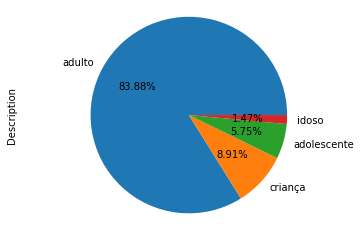

In [12]:
# Sem o uso do Plotly:
def get_description(row):
     if row.Age <= 12:
       return 'criança'
     elif row.Age >= 65:
        return 'idoso'
     elif row.Age >=18<65:
        return 'adulto'
     elif row.Age >12<18:
        return 'adolescente'
    

df['Description'] = df.apply(get_description, axis=1)
df.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')